## Imports


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Getting the datasets

In [2]:
application_data = pd.read_csv("application_data.csv")
prev_data = pd.read_csv("previous_application.csv")

## Merging the datasets

In [3]:
merged = application_data.merge(prev_data,on='SK_ID_CURR')

In [4]:
merged.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0


# Categorical data

In [5]:
categorical  = merged.select_dtypes(include=['object']).columns

In [6]:
categorical

Index(['NAME_CONTRACT_TYPE_x', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE_x', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START_x', 'ORGANIZATION_TYPE',
       'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE',
       'EMERGENCYSTATE_MODE', 'NAME_CONTRACT_TYPE_y',
       'WEEKDAY_APPR_PROCESS_START_y', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE_y', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION'],
      dtype='object')

### Contract type

In [7]:
merged['NAME_CONTRACT_TYPE_x'].value_counts()    

Cash loans         1307115
Revolving loans     106586
Name: NAME_CONTRACT_TYPE_x, dtype: int64

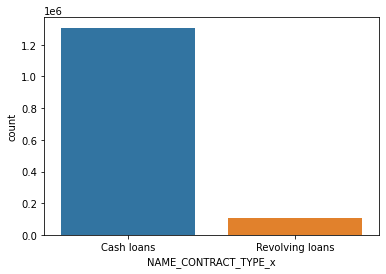

In [8]:
sns.countplot(merged['NAME_CONTRACT_TYPE_x'])
plt.show()

Observation:1 -- **92.46% of the contracts are for cash loans**

### Income type

In [9]:
income_type = merged['NAME_INCOME_TYPE'].value_counts()
income_type

Working                 724089
Commercial associate    321481
Pensioner               273544
State servant            94424
Unemployed                 123
Student                     24
Maternity leave             16
Name: NAME_INCOME_TYPE, dtype: int64

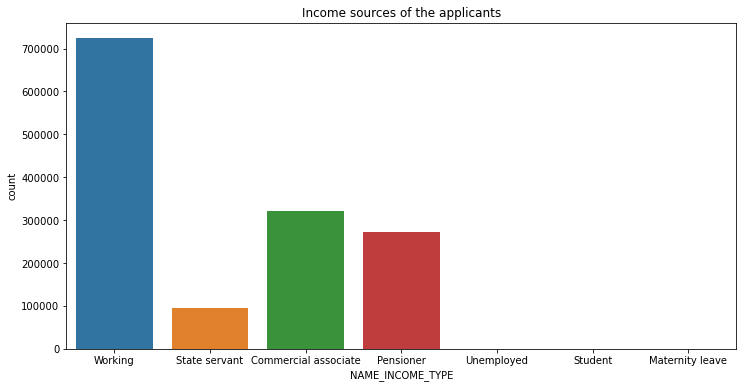

In [10]:
# order the plot using frequency.(sort values)
plt.figure(figsize=(12,6)) # width = 12 and height = 6
sns.countplot(merged['NAME_INCOME_TYPE'])
plt.title('Income sources of the applicants')
plt.show()

Observation: 2 -- **51.21% of the applicants are working.
                  22.74% are commerical associate**

### Weekday process start

In [11]:
merged['WEEKDAY_APPR_PROCESS_START_x'].value_counts()

TUESDAY      248632
WEDNESDAY    236197
MONDAY       234497
THURSDAY     230278
FRIDAY       230247
SATURDAY     157173
SUNDAY        76677
Name: WEEKDAY_APPR_PROCESS_START_x, dtype: int64

Observation 3: **17.58% applicants applied on Tu. 16.70% on wed and 16.58% on mon**

In [12]:
# should we remove the outliers at this step?

### House type mode

In [13]:
merged['HOUSETYPE_MODE'].value_counts()

block of flats      696547
specific housing      7345
terraced house        5643
Name: HOUSETYPE_MODE, dtype: int64

In [14]:
(696547/709535)*100

98.16950538028428

observation 4 : **98.16% of the applicants have block of flats as house type.**

### Cash loan purpose

In [15]:
merged['NAME_CASH_LOAN_PURPOSE'].value_counts()

XAP                                 786937
XNA                                 567351
Repairs                              20117
Other                                13432
Urgent needs                          7236
Buying a used car                     2469
Building a house or an annex          2344
Everyday expenses                     2052
Medicine                              1871
Payments on other loans               1573
Education                             1334
Journey                               1042
Purchase of electronic equipment       934
Buying a new car                       886
Wedding / gift / holiday               801
Buying a home                          701
Car repairs                            691
Furniture                              660
Buying a holiday home / land           463
Business development                   359
Gasification / water supply            251
Buying a garage                        116
Hobby                                   45
Money for a

observation 5:**Feature cash loan purpose has high number of XAP and XNA**

In [16]:
# how to deal with it? delete the feature?

In [17]:
merged['NAME_CONTRACT_TYPE_y'].value_counts()

Cash loans         626764
Consumer loans     625256
Revolving loans    161368
XNA                   313
Name: NAME_CONTRACT_TYPE_y, dtype: int64

In [18]:
merged['NAME_CONTRACT_TYPE_y'].value_counts().sum()

1413701

In [19]:
(625256/1413701)*100

44.22830570254955

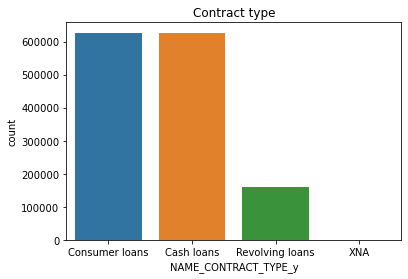

In [20]:
# include the defaulter's rate
sns.countplot(merged['NAME_CONTRACT_TYPE_y'])
plt.title("Contract type")
plt.show()

observation 6: **44.33% applicants applied for cash loans and 44.22% for consumer loans.**

### Contract status

In [21]:
merged['NAME_CONTRACT_STATUS'].value_counts()

Approved        886099
Canceled        259441
Refused         245390
Unused offer     22771
Name: NAME_CONTRACT_STATUS, dtype: int64

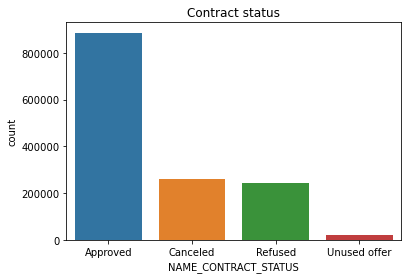

In [22]:
sns.countplot(merged['NAME_CONTRACT_STATUS'])
plt.title('Contract status')
plt.show()

In [23]:
merged['NAME_CONTRACT_STATUS'].value_counts().sum()

1413701

In [24]:
(886099/1413701)*100

62.67937845414271

Observation 6: **62.67% of the loans were approved.**

### Payment type

In [25]:
merged['NAME_PAYMENT_TYPE'].value_counts()

Cash through the bank                        882700
XNA                                          522960
Non-cash from your account                     7100
Cashless from the account of the employer       941
Name: NAME_PAYMENT_TYPE, dtype: int64

In [26]:
merged['NAME_PAYMENT_TYPE'].value_counts().sum()

1413701

In [27]:
(522960/1413701)*100

36.99226356917057

Observation 7: **62.43% of the applicants' payement was cash through bank but around 36.99% of the data is XNA, so not clear about this feature**

In [28]:
merged['CODE_REJECT_REASON'].value_counts()

XAP       1145533
HC         145984
LIMIT       47773
SCO         32636
CLIENT      22771
SCOFR       10875
XNA          4378
VERIF        3079
SYSTEM        672
Name: CODE_REJECT_REASON, dtype: int64

Observation 8: **Feature XAP** has 81.03% of XAP data.

### Client type

In [29]:
merged['NAME_CLIENT_TYPE'].value_counts()

Repeater     1037682
New           259540
Refreshed     114936
XNA             1543
Name: NAME_CLIENT_TYPE, dtype: int64

Observation 9: **73.40% applicants are repeaters and around 18.35% of the applicants are new.**

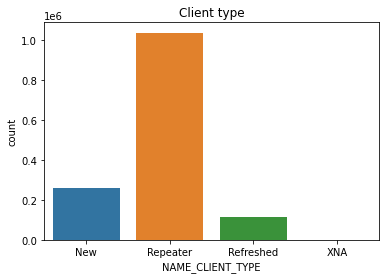

In [30]:
sns.countplot(merged['NAME_CLIENT_TYPE'])
plt.title('Client type')
plt.show()

### Portfolio

In [31]:
merged['NAME_PORTFOLIO'].value_counts()

POS      592460
Cash     391663
XNA      307213
Cards    121985
Cars        380
Name: NAME_PORTFOLIO, dtype: int64

In [32]:
# what is POS? -- credit card machine

### Product type

In [33]:
 merged['NAME_PRODUCT_TYPE'].value_counts()

XNA        900053
x-sell     385394
walk-in    128254
Name: NAME_PRODUCT_TYPE, dtype: int64

In [34]:
# high number of XNA

### Channel type

In [35]:
merged['CHANNEL_TYPE'].value_counts()

Credit and cash offices       600342
Country-wide                  423062
Stone                         183508
Regional / Local               92472
Contact center                 58891
AP+ (Cash loan)                49624
Channel of corporate sales      5396
Car dealer                       406
Name: CHANNEL_TYPE, dtype: int64

In [36]:
merged['CHANNEL_TYPE'].value_counts().sum()

1413701

In [37]:
(600342/1413701)*100

42.4659811374541

Observation 10: **Credit and cash offices remains the most popular channel, around 42.46% customers were acquired through this channel.**

### Product combination

In [38]:
merged['PRODUCT_COMBINATION'].value_counts()

Cash                              235101
POS household with interest       226464
POS mobile with interest          190850
Cash X-Sell: middle               120036
Cash X-Sell: low                  110599
Card Street                        94594
POS industry with interest         83508
POS household without interest     71519
Card X-Sell                        66774
Cash Street: high                  51699
Cash X-Sell: high                  50802
Cash Street: middle                29934
Cash Street: low                   28593
POS other with interest            20309
POS mobile without interest        19890
POS industry without interest      10621
POS others without interest         2095
Name: PRODUCT_COMBINATION, dtype: int64

In [39]:
# what is POS again?

# Numerical data

In [40]:
numerical  = merged.select_dtypes(include=['int64','float64']).columns

In [41]:
numerical

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ...
       'RATE_INTEREST_PRIVILEGED', 'DAYS_DECISION', 'SELLERPLACE_AREA',
       'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object', length=126)

In [52]:
# line chart gor numerical data's plotting

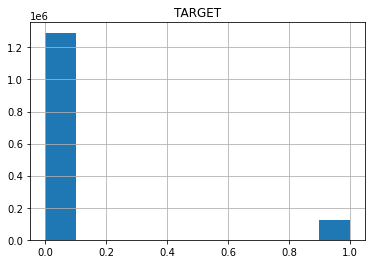

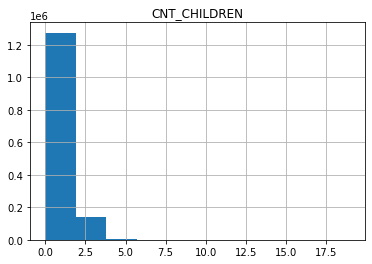

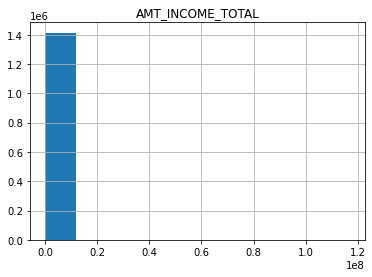

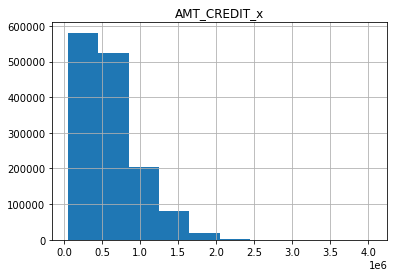

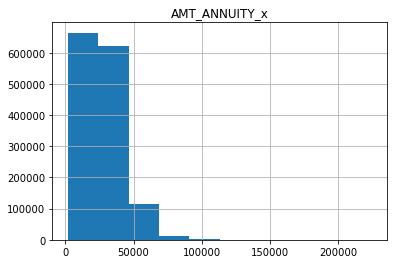

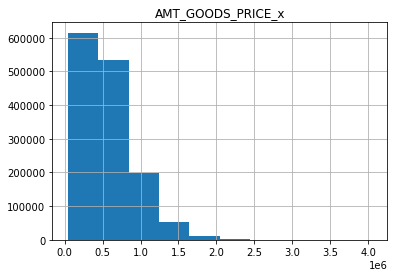

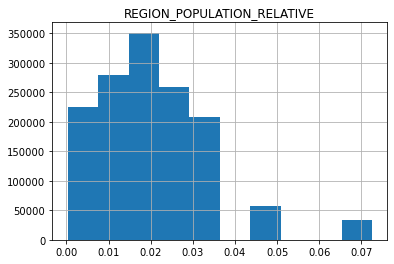

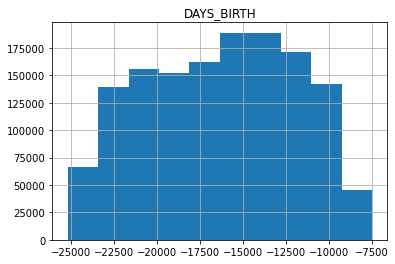

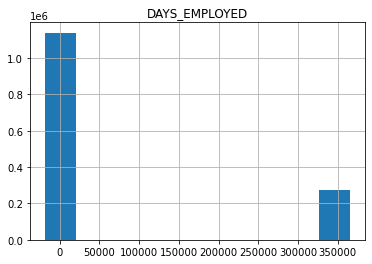

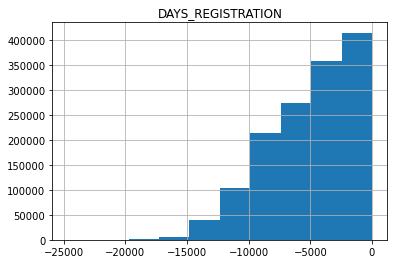

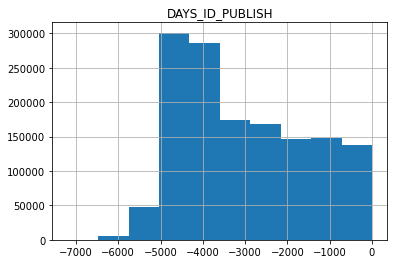

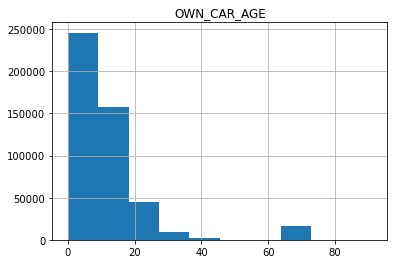

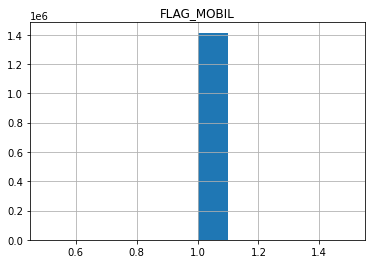

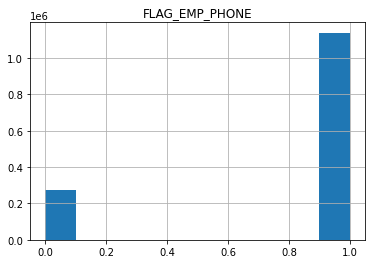

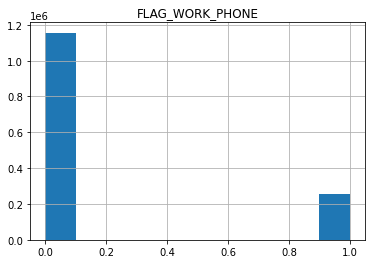

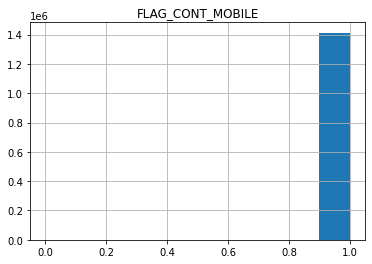

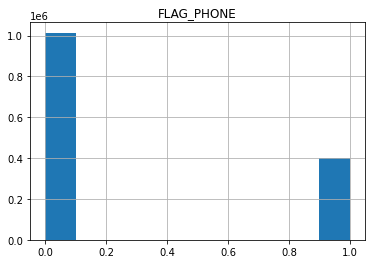

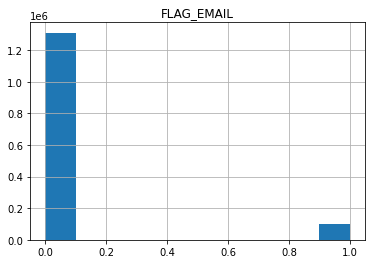

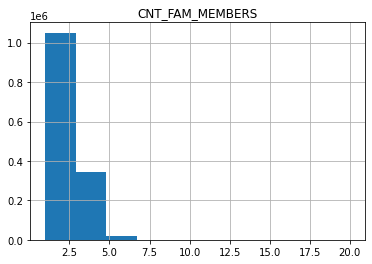

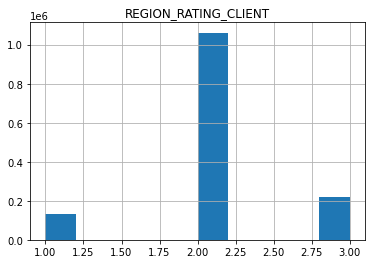

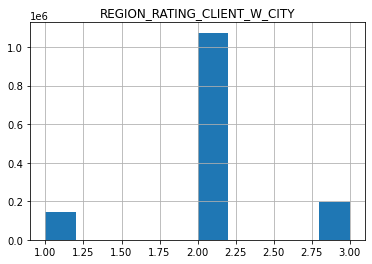

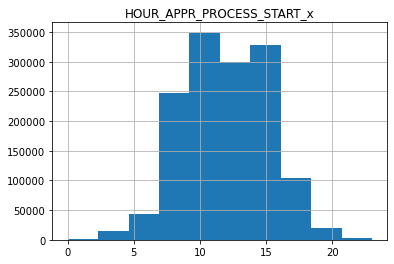

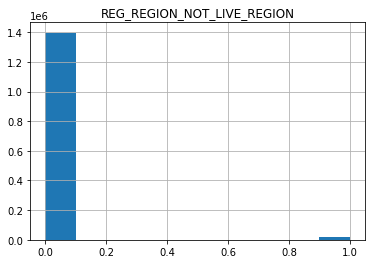

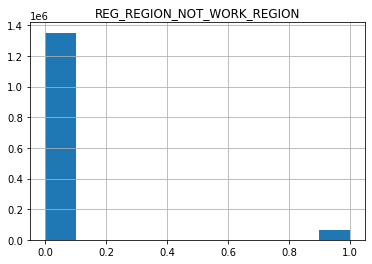

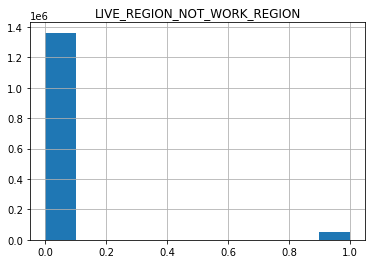

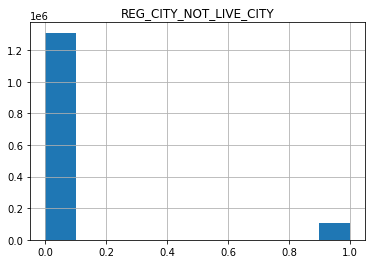

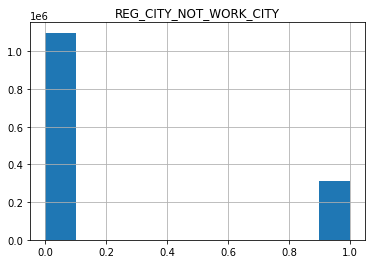

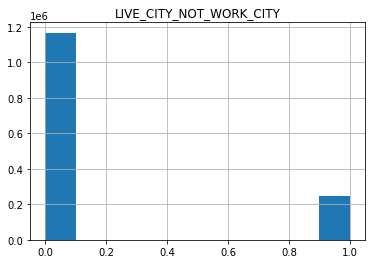

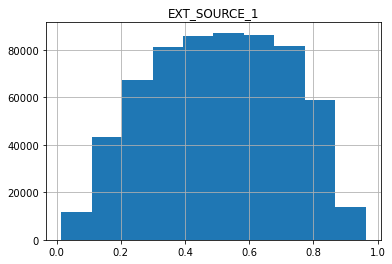

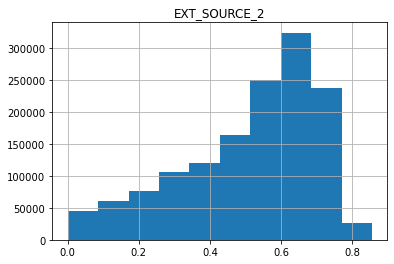

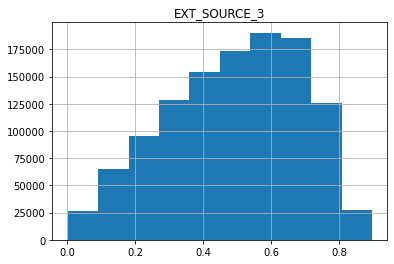

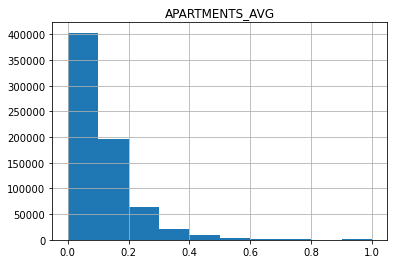

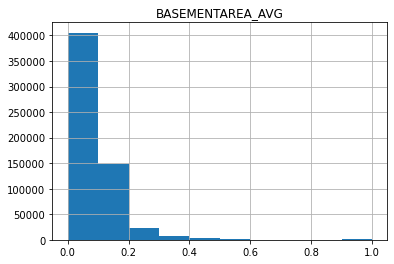

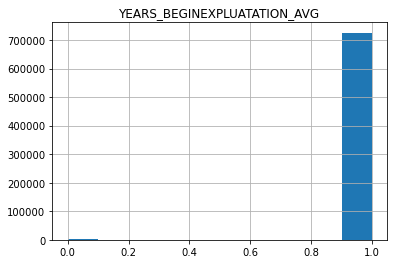

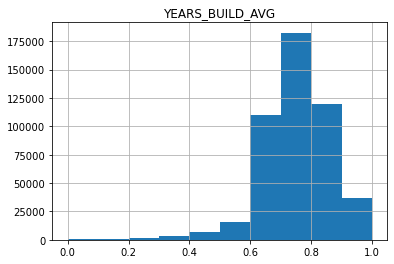

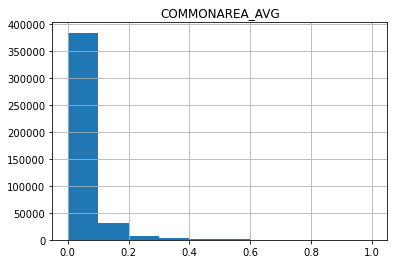

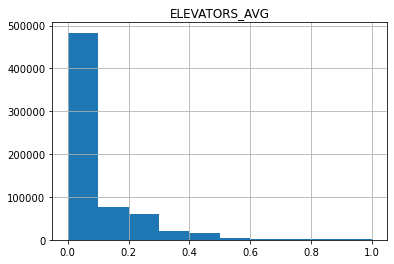

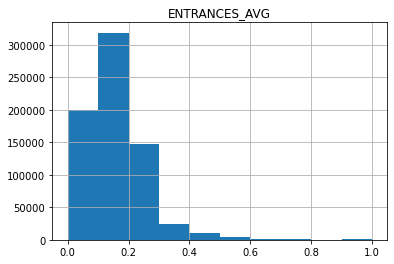

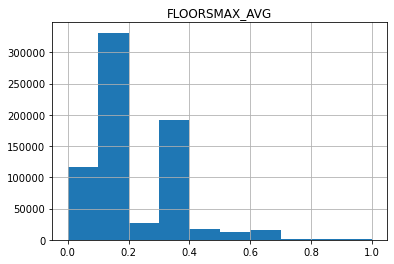

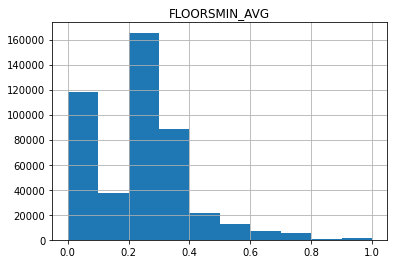

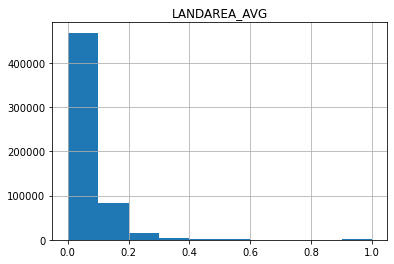

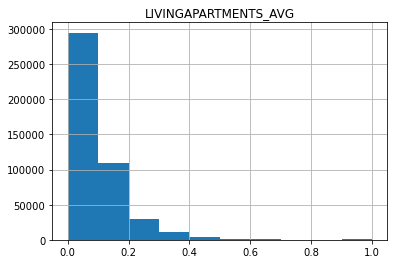

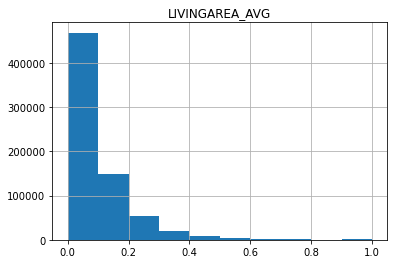

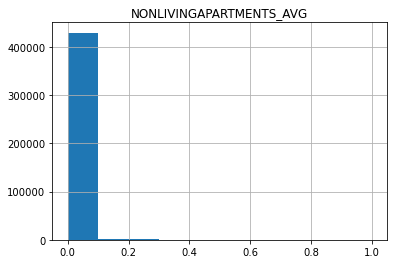

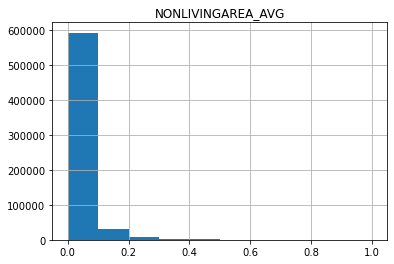

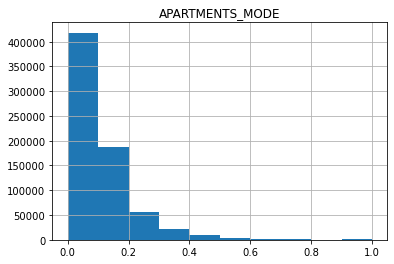

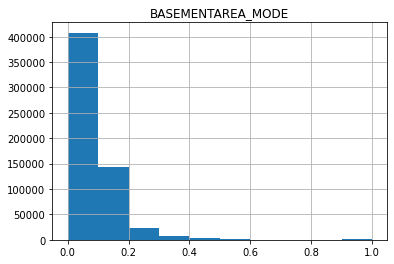

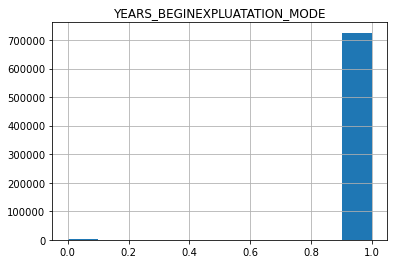

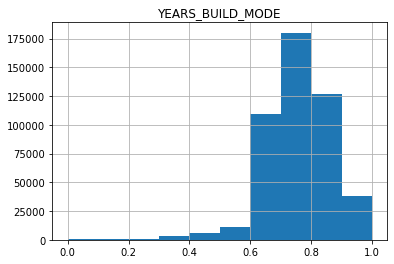

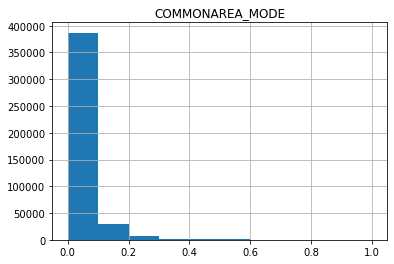

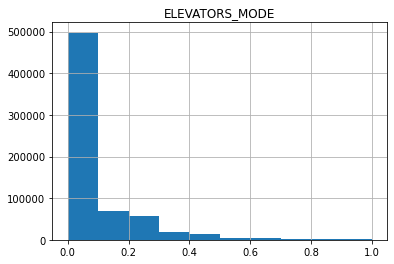

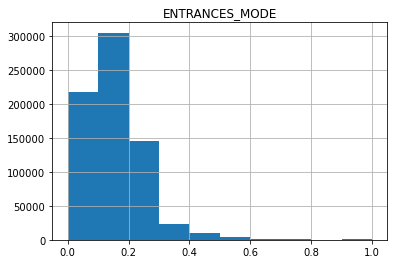

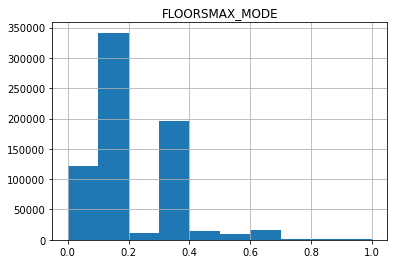

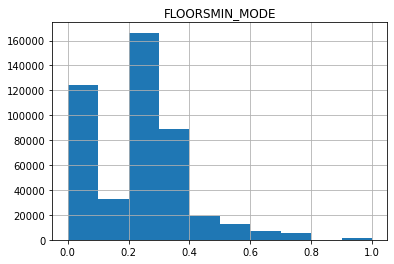

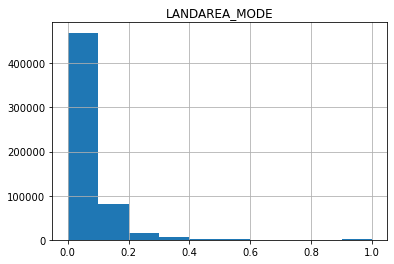

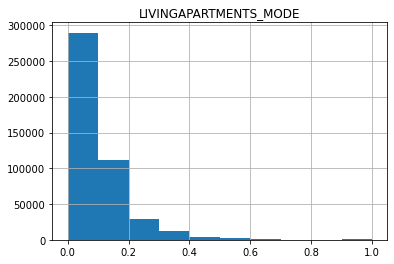

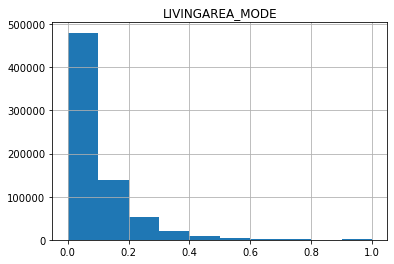

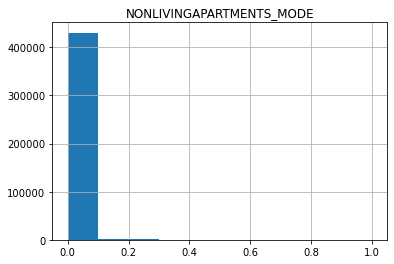

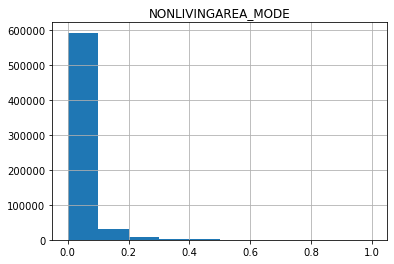

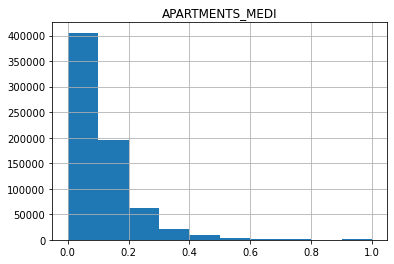

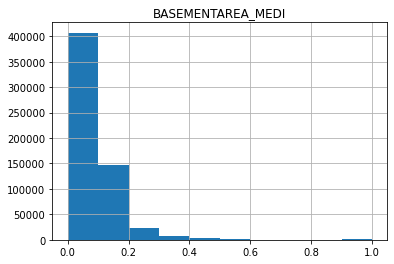

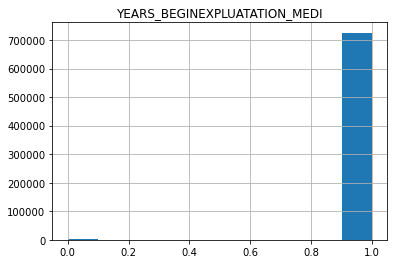

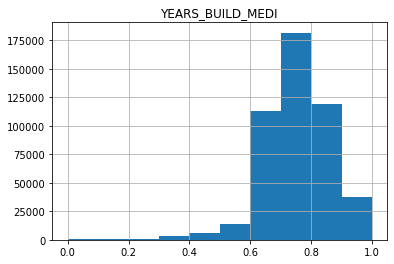

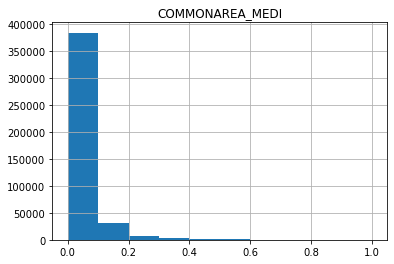

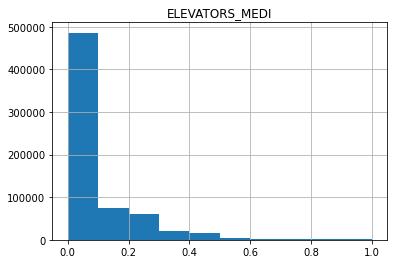

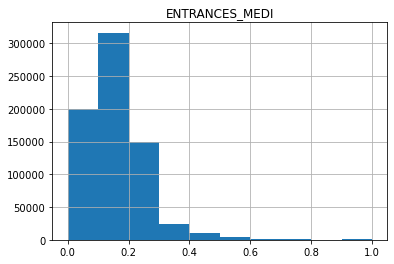

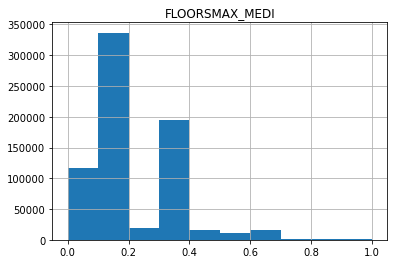

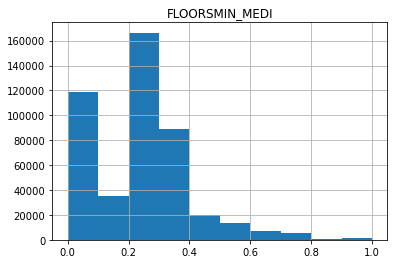

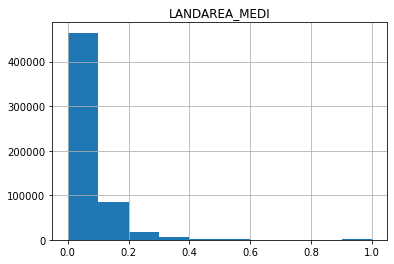

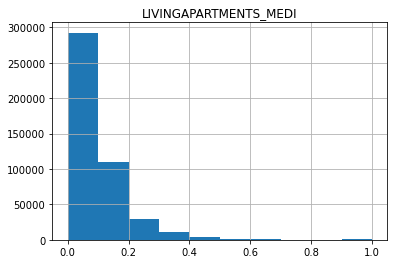

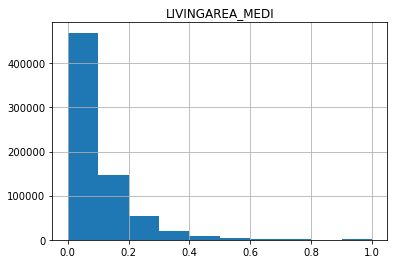

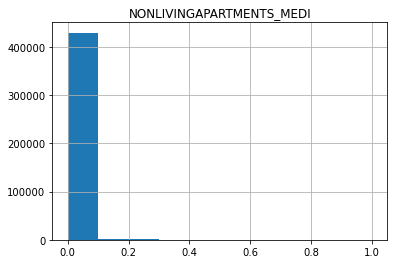

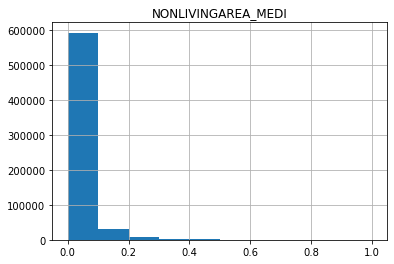

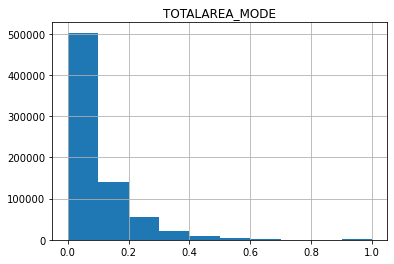

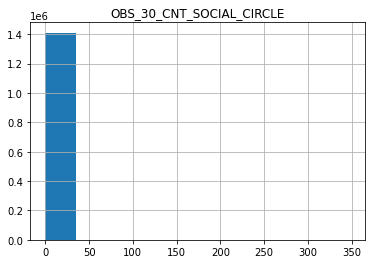

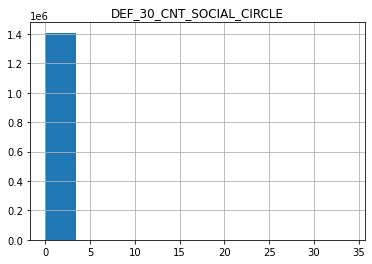

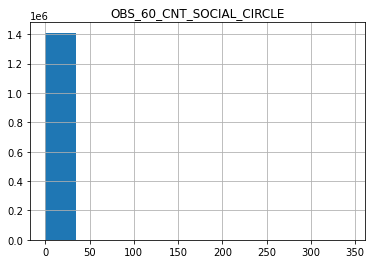

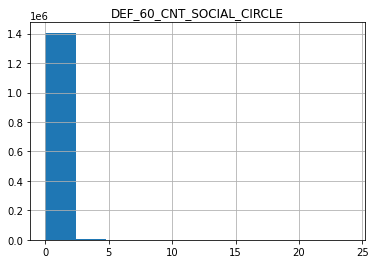

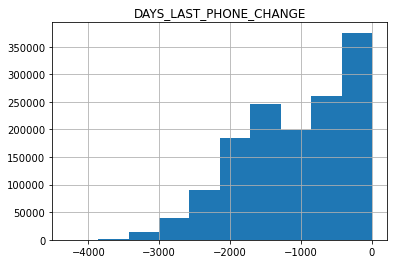

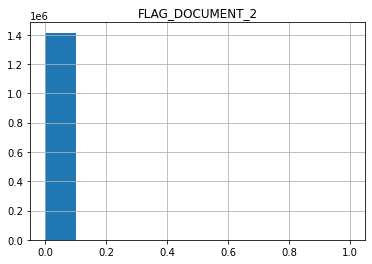

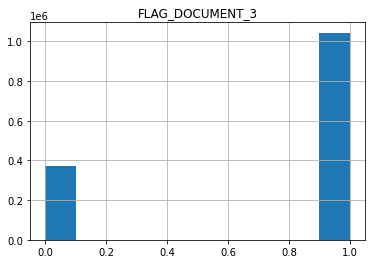

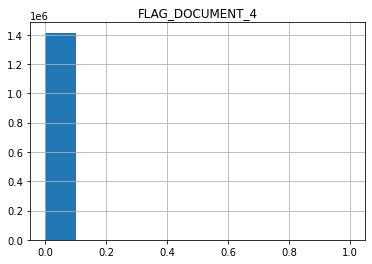

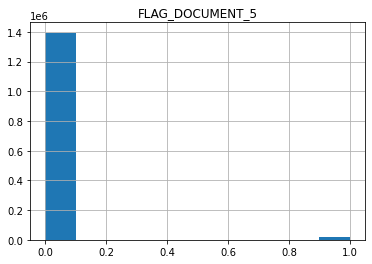

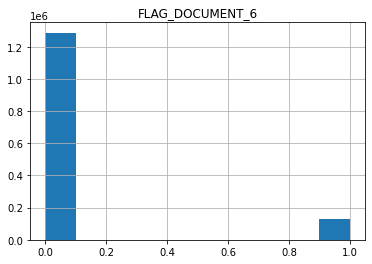

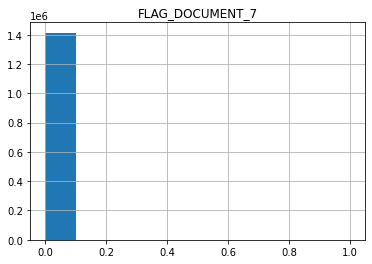

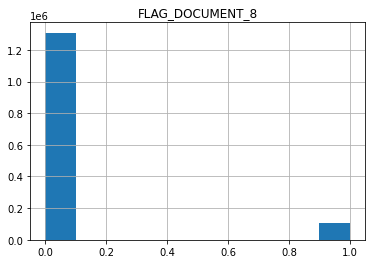

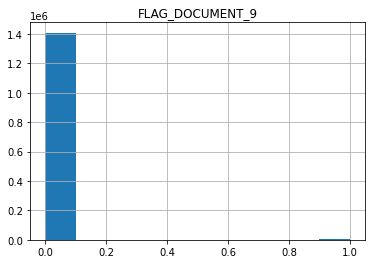

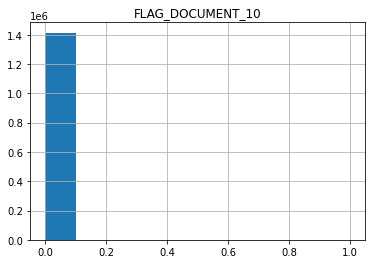

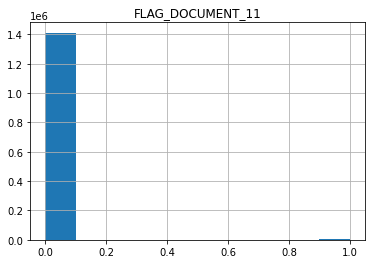

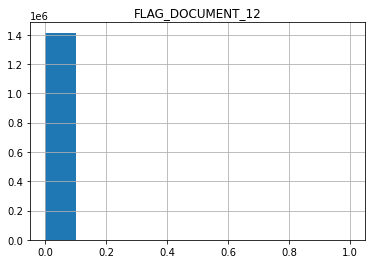

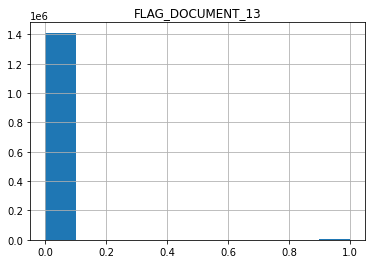

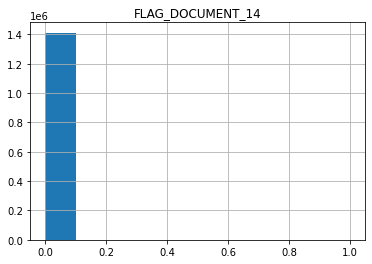

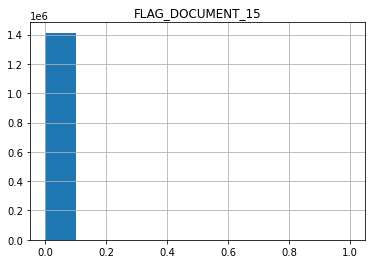

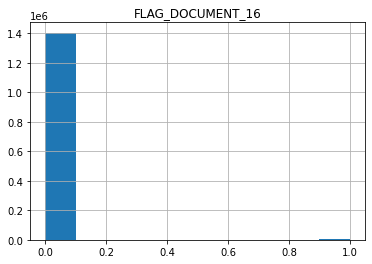

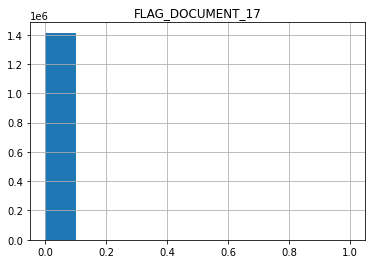

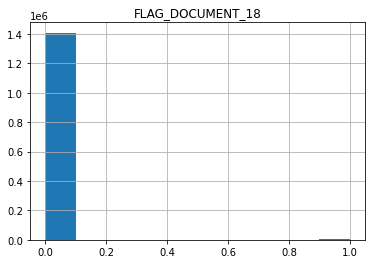

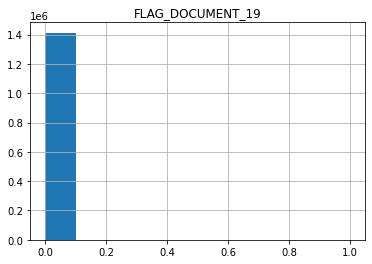

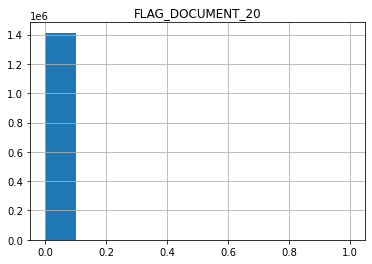

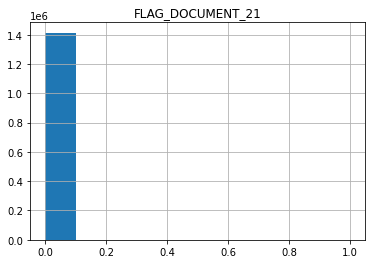

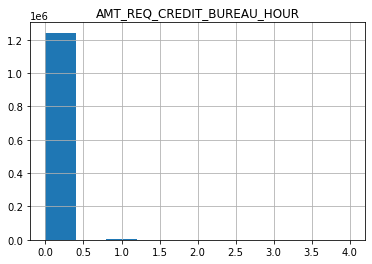

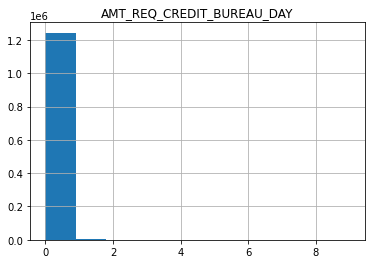

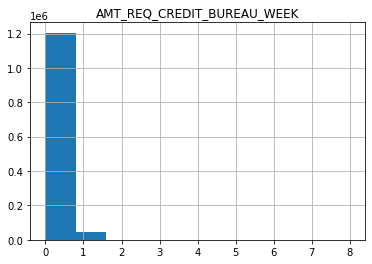

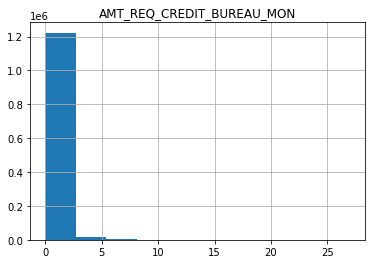

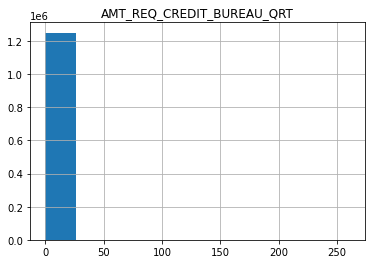

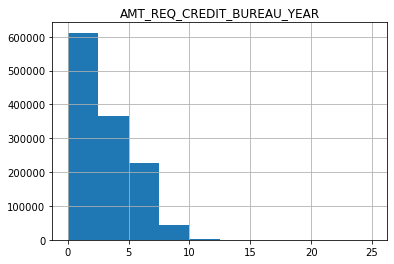

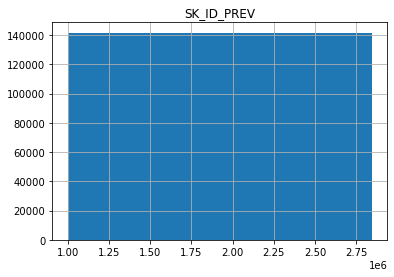

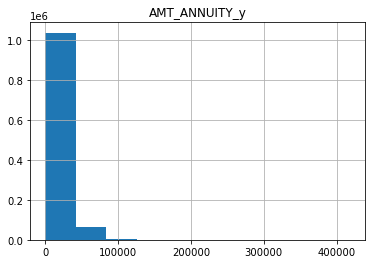

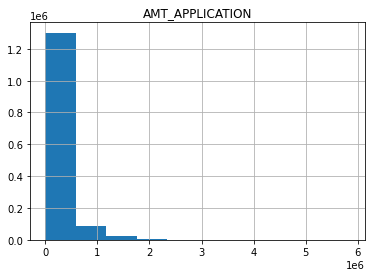

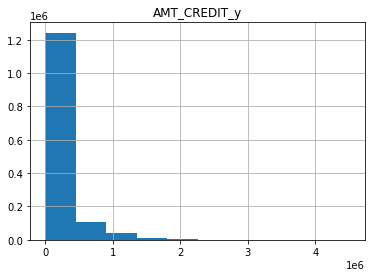

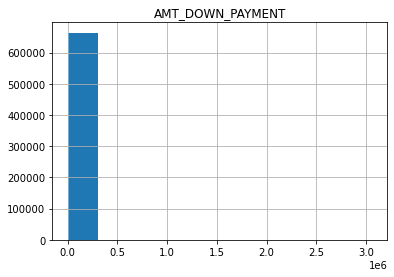

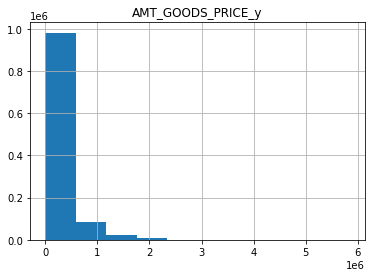

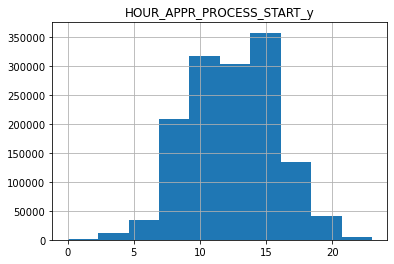

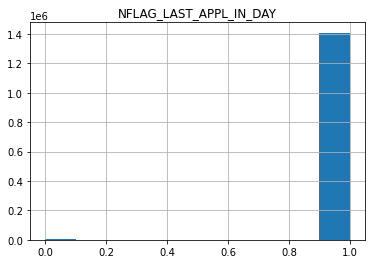

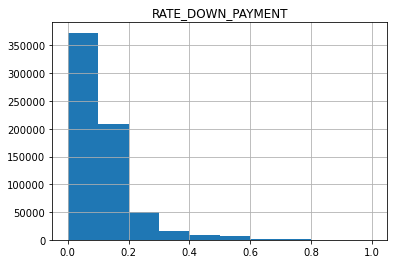

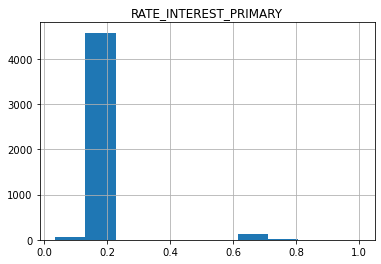

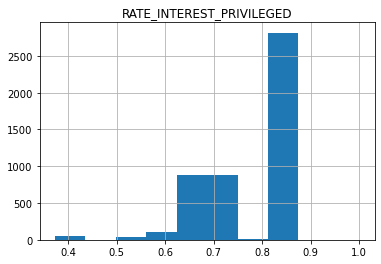

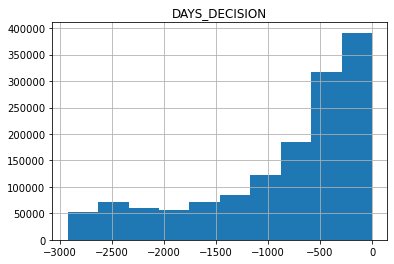

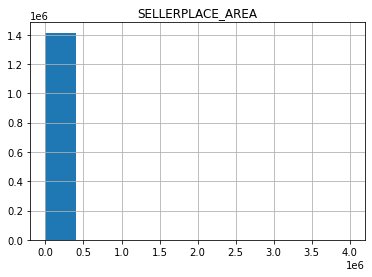

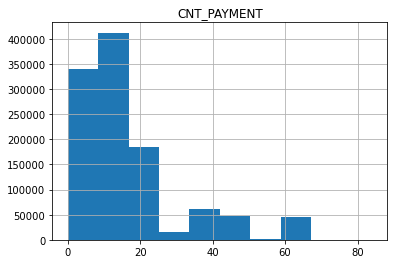

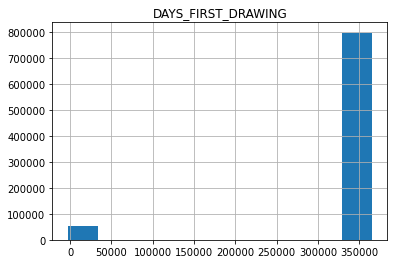

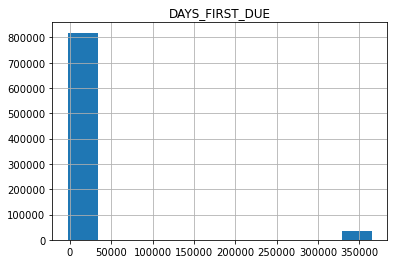

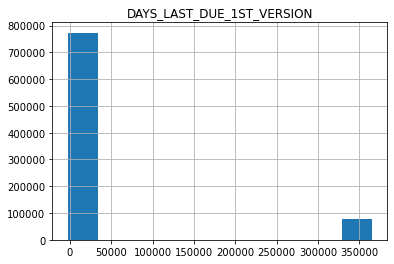

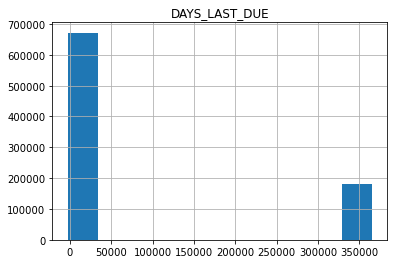

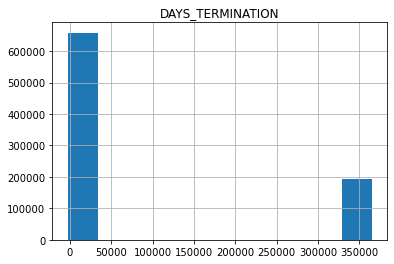

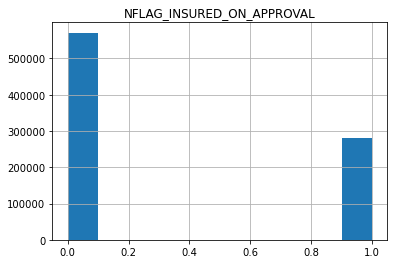

In [51]:
# how can I sort values in the plot?
for n in numerical[1::]:
    plt.figure()
    plt.title(str(n))
    merged[str(n)].hist()